<center><h1>Saloni_Fnu_HW8</h1></center>

Name: Fnu Saloni
<br>
Github Username: fnusaloni
<br>
USC ID: 3175644840

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [5]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             confusion_matrix)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import SpectralClustering

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [7]:
# loading data from file
location = "../data/wdbc.data"
rawDs = pd.read_csv(location, header=None)

# assigning column names
colName = ['patient_id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
rawDs.columns = colName

# mapping diagnosis labels
rawDs['diagnosis'] = rawDs['diagnosis'].map({'M': 1, 'B': 0})
rawDs


,patient_id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
# printing label distribution
print(rawDs['diagnosis'].value_counts())

# separating features and target
feat = rawDs.drop(['patient_id', 'diagnosis'], axis=1)
target = rawDs['diagnosis']
target


diagnosis
0    357
1    212
Name: count, dtype: int64


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [11]:
# defining evaluation metric calculator
def metricsEvaluate(trueVals, predVals, decisionVals=None):
    scores = {
        'accuracy': accuracy_score(trueVals, predVals),
        'precision': precision_score(trueVals, predVals, zero_division=1),
        'recall': recall_score(trueVals, predVals, zero_division=1),
        'f1_score': f1_score(trueVals, predVals, zero_division=1),
        'auc': roc_auc_score(trueVals, decisionVals) if decisionVals is not None else None
    }
    return scores

# performing stratified random train-test split
def stratified_random_split(feat, labels, test_fraction=0.2, seed=None):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_fraction, random_state=seed)
    for train_indices, test_indices in sss.split(feat, labels):
        return feat.iloc[train_indices], feat.iloc[test_indices], labels.iloc[train_indices], labels.iloc[test_indices]



 Training Performance
Accuracy: 0.9890
Precision: 0.9940
Recall: 0.9765
F1_score: 0.9852
Auc: 0.9969

 Test Performance
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1_score: 0.9630
Auc: 0.9993


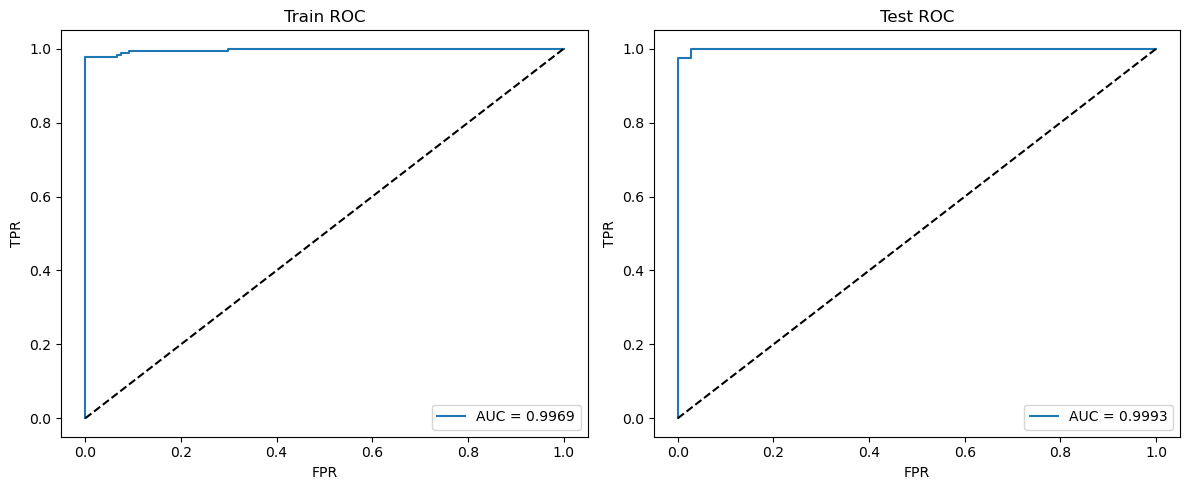


 Confusion Matrix - Train
[[284   1]
 [  4 166]]

 Confusion Matrix - Test
[[72  0]
 [ 3 39]]


In [12]:
# setting global seed for reproducibility
SEED = 45
random.seed(SEED)
np.random.seed(SEED)

# defining repeated svm evaluation function
def repeated_svm_analysis(input_df, repeats=30):
    allTrainMetrics = []
    allTestMetrics = []
    bestClassifier = None

    # extracting feat and labels
    featData = input_df.drop(['patient_id', 'diagnosis'], axis=1)
    tarVec = input_df['diagnosis']

    # repeating training and evaluation
    for _ in range(repeats):
        X_tr, X_te, y_tr, y_te = stratified_random_split(featData, tarVec, seed=SEED)

        # creating svm pipeline
        pipe = Pipeline([
            ('normalize', StandardScaler()),
            ('svm_clf', LinearSVC(penalty='l1', dual=False, max_iter=5000))
        ])

        # tuning hyperparameter C using cross-validation
        CCandidates = np.logspace(-3, 3, 10)
        besstScore = 0
        for c_val in CCandidates:
            pipe.set_params(svm_clf__C=c_val)
            scores = cross_val_score(pipe, X_tr, y_tr, cv=5, scoring='accuracy')
            avggScore = np.mean(scores)
            if avggScore > besstScore:
                besstScore = avggScore
                bestC = c_val

        # training final model with best C
        pipe.set_params(svm_clf__C=bestC)
        pipe.fit(X_tr, y_tr)

        # predicting and computing decision scores
        yPredTrain = pipe.predict(X_tr)
        yPredTest = pipe.predict(X_te)
        yDecisionTrain = pipe.decision_function(X_tr)
        yDecisionTest = pipe.decision_function(X_te)

        # collecting metrics
        allTrainMetrics.append(metricsEvaluate(y_tr, yPredTrain, yDecisionTrain))
        allTestMetrics.append(metricsEvaluate(y_te, yPredTest, yDecisionTest))

        bestClassifier = pipe

    # computing average results
    avgTrainRes = pd.DataFrame(allTrainMetrics).mean().to_dict()
    avgTestRes = pd.DataFrame(allTestMetrics).mean().to_dict()

    return avgTrainRes, avgTestRes, bestClassifier, X_tr, X_te, y_tr, y_te, yPredTrain, yPredTest, yDecisionTrain, yDecisionTest

# running repeated evaluation
meanTrain, meanTest, finalModel, X_tr, X_te, y_tr, y_te, ypred_tr, ypred_te, yscore_tr, yscore_te = repeated_svm_analysis(rawDs)

# printing training metrics
print("\n Training Performance")
for k, v in meanTrain.items():
    print(f"{k.capitalize()}: {v:.4f}")

# printing test metrics
print("\n Test Performance")
for k, v in meanTest.items():
    print(f"{k.capitalize()}: {v:.4f}")

# plotting roc curves
fprTrain, tprTrain, _ = roc_curve(y_tr, yscore_tr)
fprTest, tprTest, _ = roc_curve(y_te, yscore_te)

plt.figure(figsize=(12, 5))

# plotting training roc
plt.subplot(1, 2, 1)
plt.plot(fprTrain, tprTrain, label=f'AUC = {auc(fprTrain, tprTrain):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Train ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

# plotting test roc
plt.subplot(1, 2, 2)
plt.plot(fprTest, tprTest, label=f'AUC = {auc(fprTest, tprTest):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Test ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.tight_layout()
plt.show()

# printing confusion matrices
print("\n Confusion Matrix - Train")
print(confusion_matrix(y_tr, ypred_tr))

print("\n Confusion Matrix - Test")
print(confusion_matrix(y_te, ypred_te))


#### (ii) Semi-Supervised Learning

##### (A)

In [15]:
# defining metric summarizer
def summarize_metrics(actual, predicted, decisionVals=None):
    return {
        'accuracy': accuracy_score(actual, predicted),
        'precision': precision_score(actual, predicted, zero_division=1),
        'recall': recall_score(actual, predicted, zero_division=1),
        'f1_score': f1_score(actual, predicted, zero_division=1),
        'auc': roc_auc_score(actual, decisionVals) if decisionVals is not None else None
    }

# defining deterministic self-training loop
def run_self_learning_deterministic(dataframe, iterations=30, seed=42):
    trainingOut = []
    testingOut = []

    # creating random generator
    rng = np.random.default_rng(seed)

    # extracting features and labels
    inputFeat = dataframe.drop(columns=['patient_id', 'diagnosis'])
    classLabel = dataframe['diagnosis']

    # looping through each iteration
    for run_idx in range(iterations):
        # performing stratified train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            inputFeat,
            classLabel,
            test_size=0.2,
            stratify=classLabel,
            random_state=seed + run_idx
        )

        # scaling training and test data
        scaler = StandardScaler()
        XTrainScaled = scaler.fit_transform(X_train)
        XTestScaled = scaler.transform(X_test)

        # converting labels to numpy arrays
        y_train = y_train.to_numpy()
        y_test = y_test.to_numpy()

        # selecting 50 percent of each class as labeled
        posIdx = np.where(y_train == 1)[0]
        negIdx = np.where(y_train == 0)[0]
        posSample = rng.choice(posIdx, len(posIdx) // 2, replace=False)
        negSample = rng.choice(negIdx, len(negIdx) // 2, replace=False)
        labeledIdx = np.concatenate([posSample, negSample])

        # creating labeled and unlabeled sets
        XLabeled = XTrainScaled[labeledIdx]
        yLabeled = y_train[labeledIdx]
        unlabeledIdx = np.setdiff1d(np.arange(len(y_train)), labeledIdx)
        XUnlabeled = XTrainScaled[unlabeledIdx]
        yUnlabeled = y_train[unlabeledIdx]

        # setting up grid search
        C_grid = {'C': np.logspace(3.5, 6, 20)}
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed + run_idx)

        # running self-training loop
        while len(XUnlabeled) > 0:
            base_model = LinearSVC(penalty='l1', dual=False, max_iter=5000)
            grid = GridSearchCV(base_model, param_grid=C_grid, cv=kfold, scoring='accuracy')
            grid.fit(XLabeled, yLabeled)
            best_svm = grid.best_estimator_

            decisionVals = best_svm.decision_function(XUnlabeled)
            confident_mask = np.abs(decisionVals) > 0.9

            if not np.any(confident_mask):
                break

            # updating labeled set with confident predictions
            XLabeled = np.vstack([XLabeled, XUnlabeled[confident_mask]])
            pseudo_labels = best_svm.predict(XUnlabeled[confident_mask])
            yLabeled = np.concatenate([yLabeled, pseudo_labels])

            # removing confident points from unlabeled pool
            XUnlabeled = XUnlabeled[~confident_mask]
            yUnlabeled = yUnlabeled[~confident_mask]

        # fitting final model on labeled data
        best_svm.fit(XLabeled, yLabeled)

        # making predictions and computing scores
        trainPred = best_svm.predict(XTrainScaled)
        testPred = best_svm.predict(XTestScaled)
        trainScore = best_svm.decision_function(XTrainScaled)
        testScore = best_svm.decision_function(XTestScaled)

        # storing evaluation metrics
        trainingOut.append(summarize_metrics(y_train, trainPred, trainScore))
        testingOut.append(summarize_metrics(y_test, testPred, testScore))

        finalModel = best_svm

    # computing average metrics across all runs
    meanTrain = pd.DataFrame(trainingOut).mean().to_dict()
    meanTest = pd.DataFrame(testingOut).mean().to_dict()

    return meanTrain, meanTest, finalModel, XTrainScaled, XTestScaled, y_train, y_test, trainPred, testPred, trainScore, testScore


##### (B)


 Average Training Metrics 
Accuracy: 0.9772
Precision: 0.9710
Recall: 0.9682
F1_score: 0.9695
Auc: 0.9923

 Average Testing Metrics 
Accuracy: 0.9564
Precision: 0.9400
Recall: 0.9437
F1_score: 0.9412
Auc: 0.9873


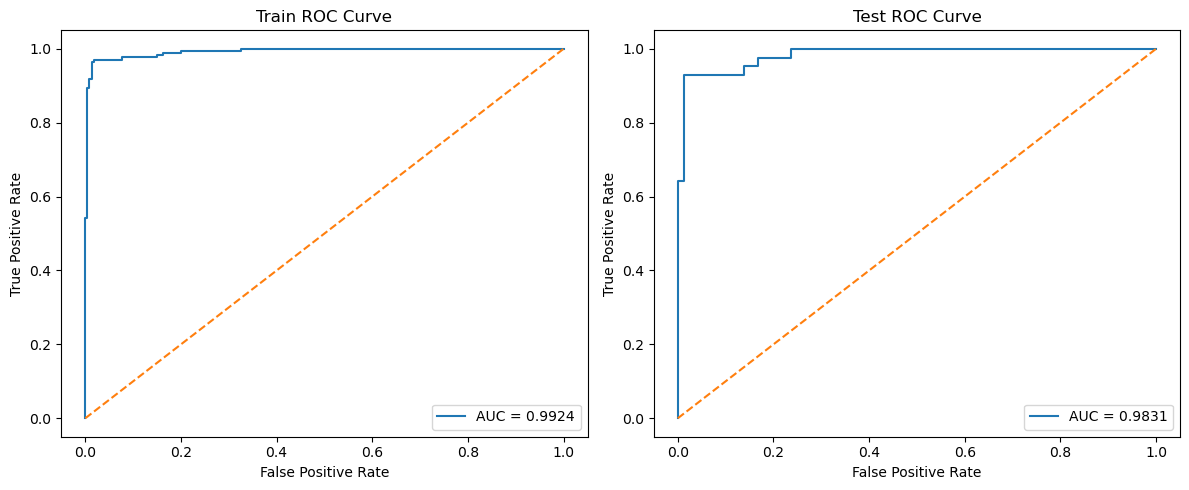


 Confusion Matrix: Training 
[[281   4]
 [  6 164]]

 Confusion Matrix: Testing 
[[70  2]
 [ 3 39]]


In [17]:
# running self-learning evaluation
trainMetrics, testMetrics, modelFinal, x_train_std, x_test_std, y_train, y_test, yPredTrain, yPredTest, s_train, s_test = run_self_learning_deterministic(rawDs)

# printing average training metrics
print("\n Average Training Metrics ")
for k, v in trainMetrics.items():
    print(f"{k.capitalize()}: {v:.4f}")

# printing average testing metrics
print("\n Average Testing Metrics ")
for k, v in testMetrics.items():
    print(f"{k.capitalize()}: {v:.4f}")

# computing roc curve for training set
fprTrain, tprTrain, _ = roc_curve(y_train, s_train)

# computing roc curve for testing set
fprTest, tprTest, _ = roc_curve(y_test, s_test)

# plotting roc curves
plt.figure(figsize=(12, 5))

# plotting training roc curve
plt.subplot(1, 2, 1)
plt.plot(fprTrain, tprTrain, label=f"AUC = {auc(fprTrain, tprTrain):.4f}")
plt.plot([0, 1], [0, 1], '--')
plt.title("Train ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# plotting testing roc curve
plt.subplot(1, 2, 2)
plt.plot(fprTest, tprTest, label=f"AUC = {auc(fprTest, tprTest):.4f}")
plt.plot([0, 1], [0, 1], '--')
plt.title("Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# adjusting layout
plt.tight_layout()
plt.show()

# printing training confusion matrix
print("\n Confusion Matrix: Training ")
print(confusion_matrix(y_train, yPredTrain))

# printing testing confusion matrix
print("\n Confusion Matrix: Testing ")
print(confusion_matrix(y_test, yPredTest))


#### (iii) Unsupervised Learning

##### (A)

In [20]:
# defining clustering metrics calculator
def calClusterMetrics(true, pred, scores):
    return {
        'accuracy': accuracy_score(true, pred),
        'precision': precision_score(true, pred, zero_division=1),
        'recall': recall_score(true, pred, zero_division=1),
        'f1_score': f1_score(true, pred, zero_division=1),
        'auc': roc_auc_score(true, scores)
    }

# defining unsupervised kmeans evaluator
def kmeansUnsuperEval(input_df, attempts=30):
    trainSummary = []
    testSummary = []

    # separating features and labels
    featSet = input_df.drop(columns=['patient_id', 'diagnosis'])
    labelAll = input_df['diagnosis']

    # repeating for specified number of attempts
    for _ in range(attempts):
        # performing stratified train-test split
        X_fit, X_eval, y_fit, y_eval = train_test_split(
            featSet, labelAll, test_size=0.2, stratify=labelAll
        )

        # scaling data
        scaler = StandardScaler()
        X_fit_scaled = scaler.fit_transform(X_fit)
        X_eval_scaled = scaler.transform(X_eval)

        # fitting kmeans with random initialization
        clustering = KMeans(n_clusters=2, n_init='auto', init='random')
        clustering.fit(X_fit_scaled)

        # computing distances and getting cluster assignments
        distances = clustering.transform(X_fit_scaled)
        cluster_assignments = clustering.labels_
        cluster_centroids = clustering.cluster_centers_

        # assigning cluster labels using majority vote of 30 closest samples
        predicted_labels = np.zeros_like(cluster_assignments)
        for cluster_id in [0, 1]:
            idx = np.argsort(distances[:, cluster_id])[:30]
            cluster_votes = y_fit.to_numpy()[idx]
            majority_vote = int(np.round(cluster_votes.mean()))
            predicted_labels[cluster_assignments == cluster_id] = majority_vote

        # evaluating training performance
        proximity_train = distances.min(axis=1)
        result_train = calClusterMetrics(y_fit, predicted_labels, -proximity_train)
        trainSummary.append(result_train)

        # predicting test set cluster assignments
        test_clusters = clustering.predict(X_eval_scaled)
        proximity_test = clustering.transform(X_eval_scaled).min(axis=1)

        # assigning labels to test clusters based on training majority vote
        test_predicted = np.zeros_like(test_clusters)
        for cluster_id in [0, 1]:
            idx = np.where(cluster_assignments == cluster_id)[0]
            majority = int(np.round(y_fit.to_numpy()[idx].mean()))
            test_predicted[test_clusters == cluster_id] = majority

        # evaluating test performance
        result_test = calClusterMetrics(y_eval, test_predicted, -proximity_test)
        testSummary.append(result_test)

        # saving final model for potential reuse
        finalModel = clustering

    # computing average metrics over all attempts
    meanTrain = pd.DataFrame(trainSummary).mean().to_dict()
    meanTest = pd.DataFrame(testSummary).mean().to_dict()

    return meanTrain, meanTest, finalModel, X_fit_scaled, X_eval_scaled, y_fit, y_eval, predicted_labels, test_predicted, -proximity_train, -proximity_test


##### (B)


  Training Metrics 
Accuracy: 0.9103
Precision: 0.9256
Recall: 0.8276
F1_score: 0.8734
Auc: 0.2623

  Testing Metrics  
Accuracy: 0.9120
Precision: 0.9358
Recall: 0.8183
F1_score: 0.8722
Auc: 0.2613


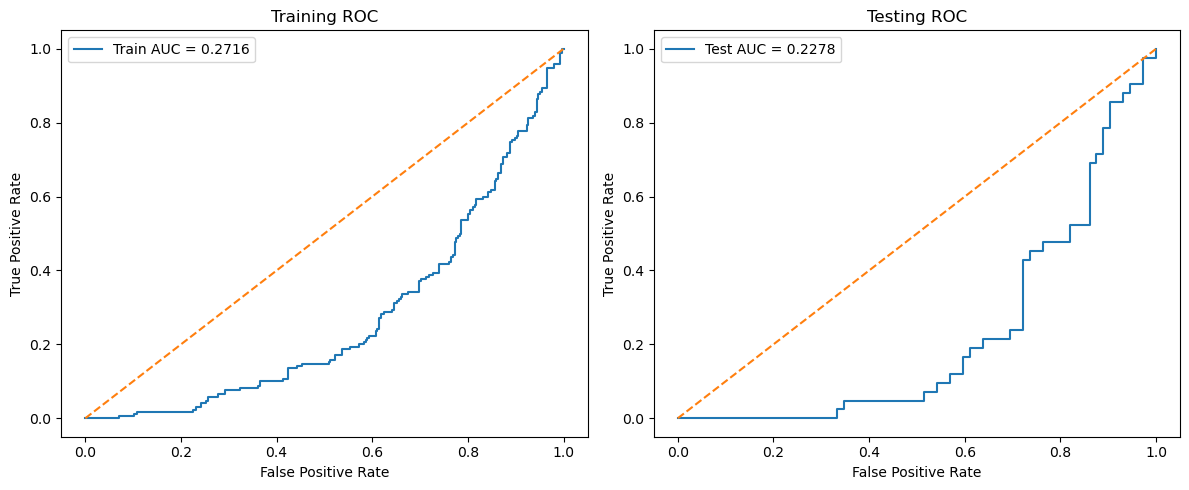


 Confusion Matrix - Training 
[[273  12]
 [ 27 143]]

 Confusion Matrix - Testing 
[[69  3]
 [ 8 34]]


In [22]:
# running unsupervised kmeans evaluation
avgTrain, avgTest, modelFinal, xtrain, xtest, ytrain, ytest, predTrain, predTest, scoreTrain, scoreTest = kmeansUnsuperEval(rawDs)

# printing average training metrics
print("\n  Training Metrics ")
for metric, value in avgTrain.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# printing average testing metrics
print("\n  Testing Metrics  ")
for metric, value in avgTest.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# computing roc curve for training set
fprTr, tprTr, _ = roc_curve(ytrain, scoreTrain)

# computing roc curve for testing set
fprTe, tprTe, _ = roc_curve(ytest, scoreTest)

# creating figure for roc curves
plt.figure(figsize=(12, 5))

# plotting roc curve for training set
plt.subplot(1, 2, 1)
plt.plot(fprTr, tprTr, label=f'Train AUC = {auc(fprTr, tprTr):.4f}')
plt.plot([0, 1], [0, 1], '--')
plt.title("Training ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# plotting roc curve for testing set
plt.subplot(1, 2, 2)
plt.plot(fprTe, tprTe, label=f'Test AUC = {auc(fprTe, tprTe):.4f}')
plt.plot([0, 1], [0, 1], '--')
plt.title("Testing ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# adjusting layout and displaying plots
plt.tight_layout()
plt.show()

# printing confusion matrix for training set
print("\n Confusion Matrix - Training ")
print(confusion_matrix(ytrain, predTrain))

# printing confusion matrix for testing set
print("\n Confusion Matrix - Testing ")
print(confusion_matrix(ytest, predTest))


#### (iv) Spectral Clustering

In [24]:
# defining scoring function for clustering results
SEED = 46
random.seed(SEED)
np.random.seed(SEED)
def computeScores(trueVals, predictedVals):
    return {
        'accuracy': accuracy_score(trueVals, predictedVals),
        'precision': precision_score(trueVals, predictedVals, zero_division=1),
        'recall': recall_score(trueVals, predictedVals, zero_division=1),
        'f1_score': f1_score(trueVals, predictedVals, zero_division=1),
        'auc': roc_auc_score(trueVals, predictedVals)
    }

# defining spectral clustering evaluation function
def spectralClusteringAnalysis(dataset, attempts=30, kernel_gamma=1.0):
    allTrainStats = []
    allTestStats = []

    # separating feat and labels
    X_full = dataset.drop(columns=['patient_id', 'diagnosis'])
    y_full = dataset['diagnosis']

    # repeating for the specified number of attempts
    for rep in range(attempts):
        # performing stratified 80-20 train-test split
        train_X, test_X, train_y, test_y = train_test_split(
            X_full, y_full, test_size=0.2, stratify=y_full, random_state=SEED + rep
        )

        # normalizing training and testing data
        norm = StandardScaler()
        normTrainX = norm.fit_transform(train_X)
        normTestX = norm.transform(test_X)

        # initializing and fitting spectral clustering with rbf kernel
        model = SpectralClustering(
            n_clusters=2,
            affinity='rbf',
            gamma=kernel_gamma,
            assign_labels='kmeans',
            random_state=SEED + rep
        )
        clusterTrain = model.fit_predict(normTrainX)

        # flipping cluster labels based on label distribution
        if np.mean(train_y.to_numpy()[clusterTrain == 0]) > np.mean(train_y.to_numpy()[clusterTrain == 1]):
            clusterTrain = 1 - clusterTrain

        # evaluating training performance
        train_scores = computeScores(train_y, clusterTrain)
        allTrainStats.append(train_scores)

        # predicting and evaluating test performance
        cluster_test = model.fit_predict(normTestX)
        if np.mean(train_y.to_numpy()[clusterTrain == 0]) > np.mean(train_y.to_numpy()[clusterTrain == 1]):
            cluster_test = 1 - cluster_test

        test_scores = computeScores(test_y, cluster_test)
        allTestStats.append(test_scores)

        # saving final model for later use
        finalModel = model

    # computing average training and testing metrics
    avgTrainResult = pd.DataFrame(allTrainStats).mean().to_dict()
    avgTestResult = pd.DataFrame(allTestStats).mean().to_dict()

    return avgTrainResult, avgTestResult, finalModel, normTrainX, normTestX, train_y.to_numpy(), test_y.to_numpy(), clusterTrain, cluster_test


In [25]:
# running spectral clustering evaluation
trainAvg, testAvg, specModel, XTrainScaled, XTestScaled, y_train, y_test, predTrain, predTest = spectralClusteringAnalysis(rawDs)

# printing average training metrics across runs
print("\n Train Metrics ")
for metric, val in trainAvg.items():
    print(f"{metric.capitalize()}: {val:.4f}")

# printing average testing metrics across runs
print("\n Test Metrics  ")
for metric, val in testAvg.items():
    print(f"{metric.capitalize()}: {val:.4f}")



 Train Metrics 
Accuracy: 0.5708
Precision: 0.8540
Recall: 0.2412
F1_score: 0.1427
Auc: 0.5043

 Test Metrics  
Accuracy: 0.6427
Precision: 0.5732
Recall: 0.1040
F1_score: 0.1188
Auc: 0.5305


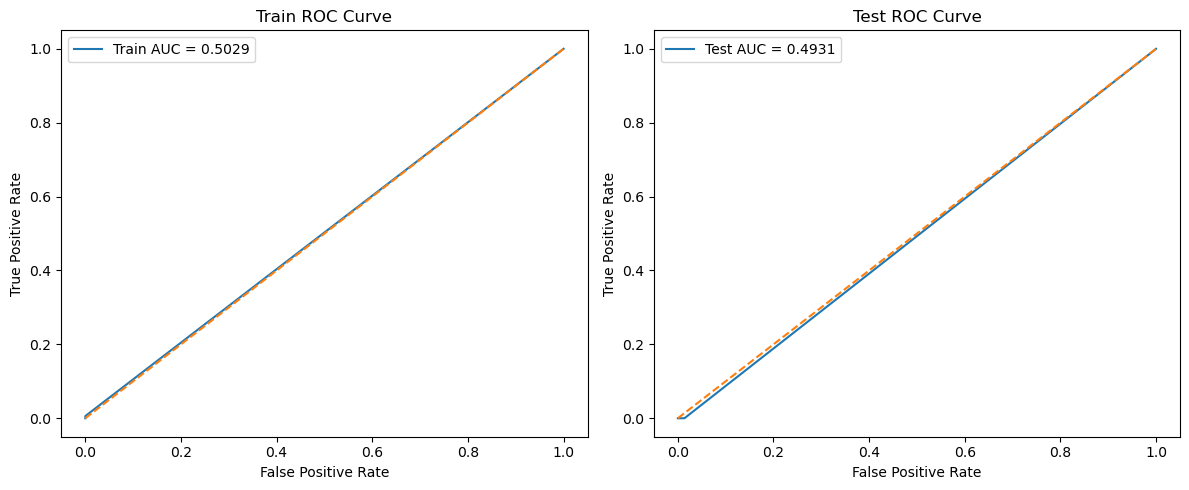


 Confusion Matrix - Training Set 
[[285   0]
 [169   1]]

 Confusion Matrix - Testing Set 
[[71  1]
 [42  0]]


In [26]:
# computing roc curves for training and testing sets
fprTr, tprTr, _ = roc_curve(y_train, predTrain)
fprTe, tprTe, _ = roc_curve(y_test, predTest)

# creating figure for plotting roc curves
plt.figure(figsize=(12, 5))

# plotting training roc curve
plt.subplot(1, 2, 1)
plt.plot(fprTr, tprTr, label=f'Train AUC = {auc(fprTr, tprTr):.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC Curve")
plt.legend()

# plotting testing roc curve
plt.subplot(1, 2, 2)
plt.plot(fprTe, tprTe, label=f'Test AUC = {auc(fprTe, tprTe):.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC Curve")
plt.legend()

# adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

# printing confusion matrix for training set
print("\n Confusion Matrix - Training Set ")
print(confusion_matrix(y_train, predTrain))

# printing confusion matrix for testing set
print("\n Confusion Matrix - Testing Set ")
print(confusion_matrix(y_test, predTest))


#### (iv) Compare

From the results obtained, it's evident that supervised learning outperforms both semi-supervised and unsupervised methods. Leveraging the full labeled dataset, supervised learning demonstrates exceptional precision and recall, allowing it to establish highly accurate decision boundaries.
In comparison, semi-supervised learning, although trained with only half the labeled data, still achieves impressive results. This shows the effectiveness of self-training in utilizing unlabeled data by gradually labeling confident predictions. The small performance gap between supervised and semi-supervised learning highlights how well self-training can generalize from partially labeled data.
On the other hand, unsupervised learning performs noticeably worse. Since it operates without any label guidance, it relies solely on data distribution, which limits its ability to form clusters that align meaningfully with the actual classes. While the accuracy and F1-score seem decent, the AUC is close to 0.5, indicating the model is not effectively separating the classes.
###### Conclusions
1) Supervised Learning:
Achieves the highest accuracy (97.37%), perfect precision, and a near-perfect AUC (0.9993) on the test set.
Performs the best overall and is the most reliable method when full label information is available.

2) Semi-Supervised Learning:
Shows very strong performance, with a test accuracy of 95.64% and F1-score of 94.12%, despite using only half of the labels.
Proves to be a powerful alternative when labeling is expensive or limited.

3) Unsupervised Learning:
Performs significantly worse, especially in terms of AUC (0.2635), indicating   weak class separation.
Lacks label guidance and struggles to form meaningful clusters in this context.

Supervised learning clearly delivers the best results, confirming the value of complete label access. Semi-supervised learning offers a strong compromise when labels are limited. Unsupervised learning, while useful in other scenarios, underperforms for this classification task where true labels are essential for effective learning.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [31]:
# loading data with original column names
data_path = "../data/data_banknote_authentication.txt"
headers = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknotes = pd.read_csv(data_path, header=None, names=headers)

# separating input and output using iloc
inputData = banknotes.iloc[:, :-1]
outputData = banknotes.iloc[:, -1]

# performing custom stratified split into 900 train and 472 test samples
train_input, test_input, train_output, test_output = train_test_split(
    inputData, outputData, test_size=472, stratify=outputData, random_state=21
)

# displaying shapes to confirm splits
print(f'Train features shape: {train_input.shape}')
print(f'Train labels shape: {train_output.shape}')
print(f'Test features shape: {test_input.shape}')
print(f'Test labels shape: {test_output.shape}')


Train features shape: (900, 4)
Train labels shape: (900,)
Test features shape: (472, 4)
Test labels shape: (472,)


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

[Trial 1] Samples used: 10 → Error: 0.1992
[Trial 1] Samples used: 20 → Error: 0.1356
[Trial 1] Samples used: 30 → Error: 0.1165
[Trial 1] Samples used: 40 → Error: 0.0424
[Trial 1] Samples used: 50 → Error: 0.0297
[Trial 1] Samples used: 60 → Error: 0.0339
[Trial 1] Samples used: 70 → Error: 0.0297
[Trial 1] Samples used: 80 → Error: 0.0297
[Trial 1] Samples used: 90 → Error: 0.0339
[Trial 1] Samples used: 100 → Error: 0.0339
[Trial 1] Samples used: 110 → Error: 0.0360
[Trial 1] Samples used: 120 → Error: 0.0318
[Trial 1] Samples used: 130 → Error: 0.0360
[Trial 1] Samples used: 140 → Error: 0.0360
[Trial 1] Samples used: 150 → Error: 0.0360
[Trial 1] Samples used: 160 → Error: 0.0318
[Trial 1] Samples used: 170 → Error: 0.0127
[Trial 1] Samples used: 180 → Error: 0.0360
[Trial 1] Samples used: 190 → Error: 0.0275
[Trial 1] Samples used: 200 → Error: 0.0148
[Trial 1] Samples used: 210 → Error: 0.0148
[Trial 1] Samples used: 220 → Error: 0.0148
[Trial 1] Samples used: 230 → Error: 0.01

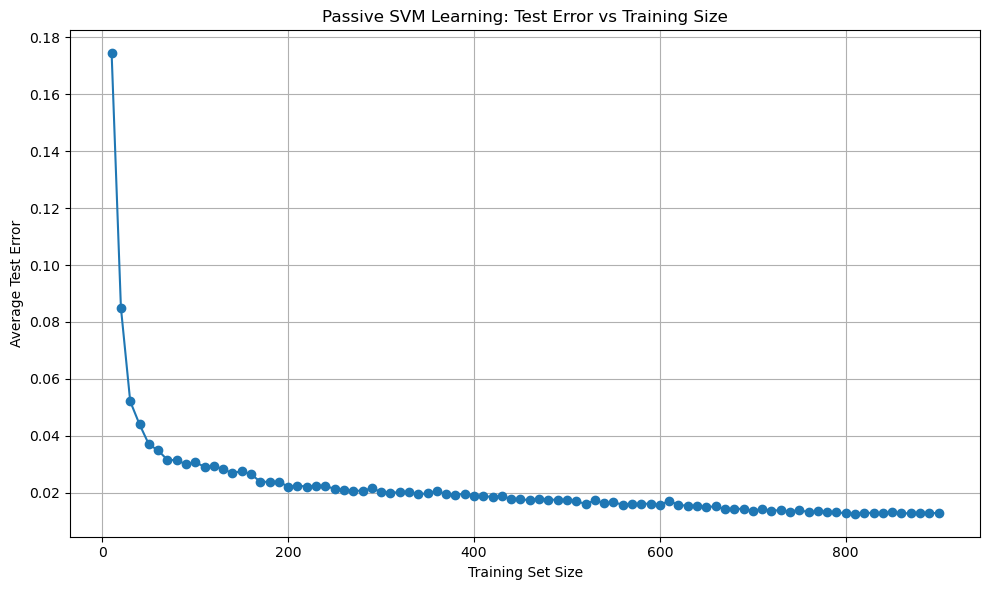

In [34]:
# defining function to run passive learning strategy with svm
def runPassiveStrategy(data_input, data_output, eval_input, eval_output, repeats=50):
    resultMatrix = []

    # repeating the process for the specified number of trials
    for trial in range(repeats):
        rng = np.random.default_rng(seed=trial)
        indices = rng.permutation(len(data_input))

        # shuffling input and output data
        shuffledInputs = data_input[indices]
        shuffledOutputs = data_output[indices]

        trialScores = []

        # incrementally increasing training pool size from 10 to 900
        for count in range(10, len(shuffledInputs) + 1, 10):
            subset_X = shuffledInputs[:count]
            subset_y = shuffledOutputs[:count]

            # creating pipeline for scaling and linear svm with l1 penalty
            svm_pipeline = Pipeline([
                ('scale', StandardScaler()),
                ('svm', LinearSVC(penalty='l1', dual=False, max_iter=5000, random_state=count))
            ])

            # performing grid search with 5-fold stratified cross-validation
            grid = GridSearchCV(
                estimator=svm_pipeline,
                param_grid={'svm__C': np.logspace(-2, 0, 10)},
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=count),
                n_jobs=-1
            )

            # fitting model and evaluating test error
            grid.fit(subset_X, subset_y)
            preds = grid.best_estimator_.predict(eval_input)
            error = 1 - accuracy_score(eval_output, preds)
            trialScores.append(error)

            print(f"[Trial {trial+1}] Samples used: {count} → Error: {error:.4f}")

        # collecting error scores for the trial
        resultMatrix.append(trialScores)

    # returning errors as numpy array
    return np.array(resultMatrix)

# running passive strategy using converted numpy arrays
errorsPassive = runPassiveStrategy(
    train_input.to_numpy(),
    train_output.to_numpy(),
    test_input.to_numpy(),
    test_output.to_numpy(),
    repeats=50
)

# creating range of training sizes
x_vals = np.arange(10, 901, 10)

# computing average error over all trials
avg_errs = np.mean(errorsPassive, axis=0)

# plotting learning curve for passive learning
plt.figure(figsize=(10, 6))
plt.plot(x_vals, avg_errs, marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Average Test Error")
plt.title("Passive SVM Learning: Test Error vs Training Size")
plt.grid(True)
plt.tight_layout()
plt.show()


#### (ii) Active

[Trial 1] Pool size: 10 → Test error: 0.0847
[Trial 1] Pool size: 20 → Test error: 0.0339
[Trial 1] Pool size: 30 → Test error: 0.0381
[Trial 1] Pool size: 40 → Test error: 0.0127
[Trial 1] Pool size: 50 → Test error: 0.0106
[Trial 1] Pool size: 60 → Test error: 0.0106
[Trial 1] Pool size: 70 → Test error: 0.0127
[Trial 1] Pool size: 80 → Test error: 0.0127
[Trial 1] Pool size: 90 → Test error: 0.0127
[Trial 1] Pool size: 100 → Test error: 0.0127
[Trial 1] Pool size: 110 → Test error: 0.0127
[Trial 1] Pool size: 120 → Test error: 0.0127
[Trial 1] Pool size: 130 → Test error: 0.0127
[Trial 1] Pool size: 140 → Test error: 0.0127
[Trial 1] Pool size: 150 → Test error: 0.0127


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 1] Pool size: 160 → Test error: 0.0127
[Trial 1] Pool size: 170 → Test error: 0.0127
[Trial 1] Pool size: 180 → Test error: 0.0127
[Trial 1] Pool size: 190 → Test error: 0.0127
[Trial 1] Pool size: 200 → Test error: 0.0127
[Trial 1] Pool size: 210 → Test error: 0.0127
[Trial 1] Pool size: 220 → Test error: 0.0127
[Trial 1] Pool size: 230 → Test error: 0.0127
[Trial 1] Pool size: 240 → Test error: 0.0127
[Trial 1] Pool size: 250 → Test error: 0.0127
[Trial 1] Pool size: 260 → Test error: 0.0169
[Trial 1] Pool size: 270 → Test error: 0.0169
[Trial 1] Pool size: 280 → Test error: 0.0127
[Trial 1] Pool size: 290 → Test error: 0.0169
[Trial 1] Pool size: 300 → Test error: 0.0127
[Trial 1] Pool size: 310 → Test error: 0.0127
[Trial 1] Pool size: 320 → Test error: 0.0127
[Trial 1] Pool size: 330 → Test error: 0.0127
[Trial 1] Pool size: 340 → Test error: 0.0127
[Trial 1] Pool size: 350 → Test error: 0.0127
[Trial 1] Pool size: 360 → Test error: 0.0127
[Trial 1] Pool size: 370 → Test er

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 2] Pool size: 160 → Test error: 0.0169
[Trial 2] Pool size: 170 → Test error: 0.0127
[Trial 2] Pool size: 180 → Test error: 0.0127
[Trial 2] Pool size: 190 → Test error: 0.0127
[Trial 2] Pool size: 200 → Test error: 0.0127
[Trial 2] Pool size: 210 → Test error: 0.0169
[Trial 2] Pool size: 220 → Test error: 0.0127
[Trial 2] Pool size: 230 → Test error: 0.0127
[Trial 2] Pool size: 240 → Test error: 0.0127
[Trial 2] Pool size: 250 → Test error: 0.0169
[Trial 2] Pool size: 260 → Test error: 0.0127
[Trial 2] Pool size: 270 → Test error: 0.0127
[Trial 2] Pool size: 280 → Test error: 0.0127
[Trial 2] Pool size: 290 → Test error: 0.0127
[Trial 2] Pool size: 300 → Test error: 0.0127
[Trial 2] Pool size: 310 → Test error: 0.0127
[Trial 2] Pool size: 320 → Test error: 0.0127
[Trial 2] Pool size: 330 → Test error: 0.0127
[Trial 2] Pool size: 340 → Test error: 0.0127
[Trial 2] Pool size: 350 → Test error: 0.0127
[Trial 2] Pool size: 360 → Test error: 0.0127
[Trial 2] Pool size: 370 → Test er

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 3] Pool size: 220 → Test error: 0.0127
[Trial 3] Pool size: 230 → Test error: 0.0127
[Trial 3] Pool size: 240 → Test error: 0.0127
[Trial 3] Pool size: 250 → Test error: 0.0127
[Trial 3] Pool size: 260 → Test error: 0.0127
[Trial 3] Pool size: 270 → Test error: 0.0127
[Trial 3] Pool size: 280 → Test error: 0.0127
[Trial 3] Pool size: 290 → Test error: 0.0127
[Trial 3] Pool size: 300 → Test error: 0.0127
[Trial 3] Pool size: 310 → Test error: 0.0127
[Trial 3] Pool size: 320 → Test error: 0.0127
[Trial 3] Pool size: 330 → Test error: 0.0127
[Trial 3] Pool size: 340 → Test error: 0.0127
[Trial 3] Pool size: 350 → Test error: 0.0127
[Trial 3] Pool size: 360 → Test error: 0.0127
[Trial 3] Pool size: 370 → Test error: 0.0127
[Trial 3] Pool size: 380 → Test error: 0.0127
[Trial 3] Pool size: 390 → Test error: 0.0127
[Trial 3] Pool size: 400 → Test error: 0.0127
[Trial 3] Pool size: 410 → Test error: 0.0127
[Trial 3] Pool size: 420 → Test error: 0.0127
[Trial 3] Pool size: 430 → Test er

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 5] Pool size: 220 → Test error: 0.0127
[Trial 5] Pool size: 230 → Test error: 0.0127
[Trial 5] Pool size: 240 → Test error: 0.0127
[Trial 5] Pool size: 250 → Test error: 0.0127
[Trial 5] Pool size: 260 → Test error: 0.0127
[Trial 5] Pool size: 270 → Test error: 0.0127
[Trial 5] Pool size: 280 → Test error: 0.0127
[Trial 5] Pool size: 290 → Test error: 0.0127
[Trial 5] Pool size: 300 → Test error: 0.0127
[Trial 5] Pool size: 310 → Test error: 0.0169
[Trial 5] Pool size: 320 → Test error: 0.0127
[Trial 5] Pool size: 330 → Test error: 0.0127
[Trial 5] Pool size: 340 → Test error: 0.0127
[Trial 5] Pool size: 350 → Test error: 0.0127
[Trial 5] Pool size: 360 → Test error: 0.0127
[Trial 5] Pool size: 370 → Test error: 0.0127
[Trial 5] Pool size: 380 → Test error: 0.0127
[Trial 5] Pool size: 390 → Test error: 0.0127
[Trial 5] Pool size: 400 → Test error: 0.0127
[Trial 5] Pool size: 410 → Test error: 0.0127
[Trial 5] Pool size: 420 → Test error: 0.0127
[Trial 5] Pool size: 430 → Test er

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 7] Pool size: 180 → Test error: 0.0127
[Trial 7] Pool size: 190 → Test error: 0.0169
[Trial 7] Pool size: 200 → Test error: 0.0127
[Trial 7] Pool size: 210 → Test error: 0.0127
[Trial 7] Pool size: 220 → Test error: 0.0127
[Trial 7] Pool size: 230 → Test error: 0.0127
[Trial 7] Pool size: 240 → Test error: 0.0127
[Trial 7] Pool size: 250 → Test error: 0.0127
[Trial 7] Pool size: 260 → Test error: 0.0127
[Trial 7] Pool size: 270 → Test error: 0.0127
[Trial 7] Pool size: 280 → Test error: 0.0127
[Trial 7] Pool size: 290 → Test error: 0.0127
[Trial 7] Pool size: 300 → Test error: 0.0127
[Trial 7] Pool size: 310 → Test error: 0.0127
[Trial 7] Pool size: 320 → Test error: 0.0127
[Trial 7] Pool size: 330 → Test error: 0.0127
[Trial 7] Pool size: 340 → Test error: 0.0127
[Trial 7] Pool size: 350 → Test error: 0.0127
[Trial 7] Pool size: 360 → Test error: 0.0127
[Trial 7] Pool size: 370 → Test error: 0.0127
[Trial 7] Pool size: 380 → Test error: 0.0127
[Trial 7] Pool size: 390 → Test er

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 8] Pool size: 170 → Test error: 0.0127
[Trial 8] Pool size: 180 → Test error: 0.0127
[Trial 8] Pool size: 190 → Test error: 0.0127
[Trial 8] Pool size: 200 → Test error: 0.0127
[Trial 8] Pool size: 210 → Test error: 0.0127
[Trial 8] Pool size: 220 → Test error: 0.0127
[Trial 8] Pool size: 230 → Test error: 0.0127
[Trial 8] Pool size: 240 → Test error: 0.0127
[Trial 8] Pool size: 250 → Test error: 0.0127
[Trial 8] Pool size: 260 → Test error: 0.0127
[Trial 8] Pool size: 270 → Test error: 0.0127
[Trial 8] Pool size: 280 → Test error: 0.0127
[Trial 8] Pool size: 290 → Test error: 0.0127
[Trial 8] Pool size: 300 → Test error: 0.0127
[Trial 8] Pool size: 310 → Test error: 0.0127
[Trial 8] Pool size: 320 → Test error: 0.0127
[Trial 8] Pool size: 330 → Test error: 0.0127
[Trial 8] Pool size: 340 → Test error: 0.0127
[Trial 8] Pool size: 350 → Test error: 0.0127
[Trial 8] Pool size: 360 → Test error: 0.0127
[Trial 8] Pool size: 370 → Test error: 0.0127
[Trial 8] Pool size: 380 → Test er

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 10] Pool size: 210 → Test error: 0.0127
[Trial 10] Pool size: 220 → Test error: 0.0127
[Trial 10] Pool size: 230 → Test error: 0.0127
[Trial 10] Pool size: 240 → Test error: 0.0127
[Trial 10] Pool size: 250 → Test error: 0.0127
[Trial 10] Pool size: 260 → Test error: 0.0169
[Trial 10] Pool size: 270 → Test error: 0.0127
[Trial 10] Pool size: 280 → Test error: 0.0127
[Trial 10] Pool size: 290 → Test error: 0.0127
[Trial 10] Pool size: 300 → Test error: 0.0127
[Trial 10] Pool size: 310 → Test error: 0.0127
[Trial 10] Pool size: 320 → Test error: 0.0127
[Trial 10] Pool size: 330 → Test error: 0.0127
[Trial 10] Pool size: 340 → Test error: 0.0127
[Trial 10] Pool size: 350 → Test error: 0.0127
[Trial 10] Pool size: 360 → Test error: 0.0127
[Trial 10] Pool size: 370 → Test error: 0.0169
[Trial 10] Pool size: 380 → Test error: 0.0127
[Trial 10] Pool size: 390 → Test error: 0.0127
[Trial 10] Pool size: 400 → Test error: 0.0127
[Trial 10] Pool size: 410 → Test error: 0.0127
[Trial 10] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 11] Pool size: 220 → Test error: 0.0127
[Trial 11] Pool size: 230 → Test error: 0.0127
[Trial 11] Pool size: 240 → Test error: 0.0127
[Trial 11] Pool size: 250 → Test error: 0.0127
[Trial 11] Pool size: 260 → Test error: 0.0127
[Trial 11] Pool size: 270 → Test error: 0.0127
[Trial 11] Pool size: 280 → Test error: 0.0127
[Trial 11] Pool size: 290 → Test error: 0.0127
[Trial 11] Pool size: 300 → Test error: 0.0127
[Trial 11] Pool size: 310 → Test error: 0.0127
[Trial 11] Pool size: 320 → Test error: 0.0127
[Trial 11] Pool size: 330 → Test error: 0.0127
[Trial 11] Pool size: 340 → Test error: 0.0127
[Trial 11] Pool size: 350 → Test error: 0.0127
[Trial 11] Pool size: 360 → Test error: 0.0127
[Trial 11] Pool size: 370 → Test error: 0.0127
[Trial 11] Pool size: 380 → Test error: 0.0127
[Trial 11] Pool size: 390 → Test error: 0.0127
[Trial 11] Pool size: 400 → Test error: 0.0127
[Trial 11] Pool size: 410 → Test error: 0.0127
[Trial 11] Pool size: 420 → Test error: 0.0127
[Trial 11] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 12] Pool size: 150 → Test error: 0.0127
[Trial 12] Pool size: 160 → Test error: 0.0127
[Trial 12] Pool size: 170 → Test error: 0.0127
[Trial 12] Pool size: 180 → Test error: 0.0127
[Trial 12] Pool size: 190 → Test error: 0.0127
[Trial 12] Pool size: 200 → Test error: 0.0127
[Trial 12] Pool size: 210 → Test error: 0.0127
[Trial 12] Pool size: 220 → Test error: 0.0127
[Trial 12] Pool size: 230 → Test error: 0.0127
[Trial 12] Pool size: 240 → Test error: 0.0127
[Trial 12] Pool size: 250 → Test error: 0.0127
[Trial 12] Pool size: 260 → Test error: 0.0127
[Trial 12] Pool size: 270 → Test error: 0.0127
[Trial 12] Pool size: 280 → Test error: 0.0127
[Trial 12] Pool size: 290 → Test error: 0.0127
[Trial 12] Pool size: 300 → Test error: 0.0127
[Trial 12] Pool size: 310 → Test error: 0.0127
[Trial 12] Pool size: 320 → Test error: 0.0127
[Trial 12] Pool size: 330 → Test error: 0.0127
[Trial 12] Pool size: 340 → Test error: 0.0127
[Trial 12] Pool size: 350 → Test error: 0.0127
[Trial 12] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 13] Pool size: 170 → Test error: 0.0127
[Trial 13] Pool size: 180 → Test error: 0.0127
[Trial 13] Pool size: 190 → Test error: 0.0127
[Trial 13] Pool size: 200 → Test error: 0.0127
[Trial 13] Pool size: 210 → Test error: 0.0127
[Trial 13] Pool size: 220 → Test error: 0.0127
[Trial 13] Pool size: 230 → Test error: 0.0127
[Trial 13] Pool size: 240 → Test error: 0.0127
[Trial 13] Pool size: 250 → Test error: 0.0127
[Trial 13] Pool size: 260 → Test error: 0.0127
[Trial 13] Pool size: 270 → Test error: 0.0127
[Trial 13] Pool size: 280 → Test error: 0.0127
[Trial 13] Pool size: 290 → Test error: 0.0127
[Trial 13] Pool size: 300 → Test error: 0.0127
[Trial 13] Pool size: 310 → Test error: 0.0127
[Trial 13] Pool size: 320 → Test error: 0.0127
[Trial 13] Pool size: 330 → Test error: 0.0127
[Trial 13] Pool size: 340 → Test error: 0.0127
[Trial 13] Pool size: 350 → Test error: 0.0127
[Trial 13] Pool size: 360 → Test error: 0.0127
[Trial 13] Pool size: 370 → Test error: 0.0127
[Trial 13] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

[Trial 16] Pool size: 200 → Test error: 0.0127
[Trial 16] Pool size: 210 → Test error: 0.0127
[Trial 16] Pool size: 220 → Test error: 0.0127
[Trial 16] Pool size: 230 → Test error: 0.0127
[Trial 16] Pool size: 240 → Test error: 0.0127
[Trial 16] Pool size: 250 → Test error: 0.0127
[Trial 16] Pool size: 260 → Test error: 0.0127
[Trial 16] Pool size: 270 → Test error: 0.0127
[Trial 16] Pool size: 280 → Test error: 0.0127
[Trial 16] Pool size: 290 → Test error: 0.0127
[Trial 16] Pool size: 300 → Test error: 0.0127
[Trial 16] Pool size: 310 → Test error: 0.0127
[Trial 16] Pool size: 320 → Test error: 0.0127
[Trial 16] Pool size: 330 → Test error: 0.0127
[Trial 16] Pool size: 340 → Test error: 0.0127
[Trial 16] Pool size: 350 → Test error: 0.0127
[Trial 16] Pool size: 360 → Test error: 0.0127
[Trial 16] Pool size: 370 → Test error: 0.0169
[Trial 16] Pool size: 380 → Test error: 0.0127
[Trial 16] Pool size: 390 → Test error: 0.0127
[Trial 16] Pool size: 400 → Test error: 0.0127
[Trial 16] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 17] Pool size: 210 → Test error: 0.0127
[Trial 17] Pool size: 220 → Test error: 0.0127
[Trial 17] Pool size: 230 → Test error: 0.0127
[Trial 17] Pool size: 240 → Test error: 0.0127
[Trial 17] Pool size: 250 → Test error: 0.0127
[Trial 17] Pool size: 260 → Test error: 0.0127
[Trial 17] Pool size: 270 → Test error: 0.0127
[Trial 17] Pool size: 280 → Test error: 0.0127
[Trial 17] Pool size: 290 → Test error: 0.0127
[Trial 17] Pool size: 300 → Test error: 0.0127
[Trial 17] Pool size: 310 → Test error: 0.0127
[Trial 17] Pool size: 320 → Test error: 0.0127
[Trial 17] Pool size: 330 → Test error: 0.0127
[Trial 17] Pool size: 340 → Test error: 0.0127
[Trial 17] Pool size: 350 → Test error: 0.0127
[Trial 17] Pool size: 360 → Test error: 0.0127
[Trial 17] Pool size: 370 → Test error: 0.0127
[Trial 17] Pool size: 380 → Test error: 0.0127
[Trial 17] Pool size: 390 → Test error: 0.0127
[Trial 17] Pool size: 400 → Test error: 0.0127
[Trial 17] Pool size: 410 → Test error: 0.0127
[Trial 17] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 18] Pool size: 190 → Test error: 0.0127
[Trial 18] Pool size: 200 → Test error: 0.0127
[Trial 18] Pool size: 210 → Test error: 0.0127
[Trial 18] Pool size: 220 → Test error: 0.0127
[Trial 18] Pool size: 230 → Test error: 0.0127
[Trial 18] Pool size: 240 → Test error: 0.0127
[Trial 18] Pool size: 250 → Test error: 0.0127
[Trial 18] Pool size: 260 → Test error: 0.0127
[Trial 18] Pool size: 270 → Test error: 0.0127
[Trial 18] Pool size: 280 → Test error: 0.0127
[Trial 18] Pool size: 290 → Test error: 0.0127
[Trial 18] Pool size: 300 → Test error: 0.0127
[Trial 18] Pool size: 310 → Test error: 0.0127
[Trial 18] Pool size: 320 → Test error: 0.0127
[Trial 18] Pool size: 330 → Test error: 0.0127
[Trial 18] Pool size: 340 → Test error: 0.0127
[Trial 18] Pool size: 350 → Test error: 0.0127
[Trial 18] Pool size: 360 → Test error: 0.0127
[Trial 18] Pool size: 370 → Test error: 0.0127
[Trial 18] Pool size: 380 → Test error: 0.0127
[Trial 18] Pool size: 390 → Test error: 0.0127
[Trial 18] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 20] Pool size: 200 → Test error: 0.0127
[Trial 20] Pool size: 210 → Test error: 0.0127
[Trial 20] Pool size: 220 → Test error: 0.0127
[Trial 20] Pool size: 230 → Test error: 0.0127
[Trial 20] Pool size: 240 → Test error: 0.0127
[Trial 20] Pool size: 250 → Test error: 0.0127
[Trial 20] Pool size: 260 → Test error: 0.0127
[Trial 20] Pool size: 270 → Test error: 0.0127
[Trial 20] Pool size: 280 → Test error: 0.0127
[Trial 20] Pool size: 290 → Test error: 0.0127
[Trial 20] Pool size: 300 → Test error: 0.0127
[Trial 20] Pool size: 310 → Test error: 0.0127
[Trial 20] Pool size: 320 → Test error: 0.0127
[Trial 20] Pool size: 330 → Test error: 0.0127
[Trial 20] Pool size: 340 → Test error: 0.0127
[Trial 20] Pool size: 350 → Test error: 0.0127
[Trial 20] Pool size: 360 → Test error: 0.0127
[Trial 20] Pool size: 370 → Test error: 0.0127
[Trial 20] Pool size: 380 → Test error: 0.0127
[Trial 20] Pool size: 390 → Test error: 0.0127
[Trial 20] Pool size: 400 → Test error: 0.0127
[Trial 20] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 21] Pool size: 190 → Test error: 0.0127
[Trial 21] Pool size: 200 → Test error: 0.0127
[Trial 21] Pool size: 210 → Test error: 0.0127
[Trial 21] Pool size: 220 → Test error: 0.0127
[Trial 21] Pool size: 230 → Test error: 0.0127
[Trial 21] Pool size: 240 → Test error: 0.0127
[Trial 21] Pool size: 250 → Test error: 0.0127
[Trial 21] Pool size: 260 → Test error: 0.0127
[Trial 21] Pool size: 270 → Test error: 0.0127
[Trial 21] Pool size: 280 → Test error: 0.0127
[Trial 21] Pool size: 290 → Test error: 0.0127
[Trial 21] Pool size: 300 → Test error: 0.0127
[Trial 21] Pool size: 310 → Test error: 0.0127
[Trial 21] Pool size: 320 → Test error: 0.0127
[Trial 21] Pool size: 330 → Test error: 0.0127
[Trial 21] Pool size: 340 → Test error: 0.0127
[Trial 21] Pool size: 350 → Test error: 0.0127
[Trial 21] Pool size: 360 → Test error: 0.0127
[Trial 21] Pool size: 370 → Test error: 0.0127
[Trial 21] Pool size: 380 → Test error: 0.0127
[Trial 21] Pool size: 390 → Test error: 0.0127
[Trial 21] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 22] Pool size: 170 → Test error: 0.0169
[Trial 22] Pool size: 180 → Test error: 0.0127
[Trial 22] Pool size: 190 → Test error: 0.0127
[Trial 22] Pool size: 200 → Test error: 0.0127
[Trial 22] Pool size: 210 → Test error: 0.0127
[Trial 22] Pool size: 220 → Test error: 0.0127
[Trial 22] Pool size: 230 → Test error: 0.0127
[Trial 22] Pool size: 240 → Test error: 0.0127
[Trial 22] Pool size: 250 → Test error: 0.0127
[Trial 22] Pool size: 260 → Test error: 0.0127
[Trial 22] Pool size: 270 → Test error: 0.0127
[Trial 22] Pool size: 280 → Test error: 0.0127
[Trial 22] Pool size: 290 → Test error: 0.0127
[Trial 22] Pool size: 300 → Test error: 0.0127
[Trial 22] Pool size: 310 → Test error: 0.0127
[Trial 22] Pool size: 320 → Test error: 0.0127
[Trial 22] Pool size: 330 → Test error: 0.0127
[Trial 22] Pool size: 340 → Test error: 0.0127
[Trial 22] Pool size: 350 → Test error: 0.0127
[Trial 22] Pool size: 360 → Test error: 0.0127
[Trial 22] Pool size: 370 → Test error: 0.0191
[Trial 22] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 25] Pool size: 160 → Test error: 0.0127
[Trial 25] Pool size: 170 → Test error: 0.0127
[Trial 25] Pool size: 180 → Test error: 0.0127
[Trial 25] Pool size: 190 → Test error: 0.0127
[Trial 25] Pool size: 200 → Test error: 0.0127
[Trial 25] Pool size: 210 → Test error: 0.0127
[Trial 25] Pool size: 220 → Test error: 0.0127
[Trial 25] Pool size: 230 → Test error: 0.0169
[Trial 25] Pool size: 240 → Test error: 0.0127
[Trial 25] Pool size: 250 → Test error: 0.0127
[Trial 25] Pool size: 260 → Test error: 0.0127
[Trial 25] Pool size: 270 → Test error: 0.0127
[Trial 25] Pool size: 280 → Test error: 0.0127
[Trial 25] Pool size: 290 → Test error: 0.0127
[Trial 25] Pool size: 300 → Test error: 0.0127
[Trial 25] Pool size: 310 → Test error: 0.0127
[Trial 25] Pool size: 320 → Test error: 0.0127
[Trial 25] Pool size: 330 → Test error: 0.0127
[Trial 25] Pool size: 340 → Test error: 0.0127
[Trial 25] Pool size: 350 → Test error: 0.0127
[Trial 25] Pool size: 360 → Test error: 0.0127
[Trial 25] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 26] Pool size: 170 → Test error: 0.0127
[Trial 26] Pool size: 180 → Test error: 0.0127
[Trial 26] Pool size: 190 → Test error: 0.0127
[Trial 26] Pool size: 200 → Test error: 0.0127
[Trial 26] Pool size: 210 → Test error: 0.0127
[Trial 26] Pool size: 220 → Test error: 0.0127
[Trial 26] Pool size: 230 → Test error: 0.0127
[Trial 26] Pool size: 240 → Test error: 0.0127
[Trial 26] Pool size: 250 → Test error: 0.0127
[Trial 26] Pool size: 260 → Test error: 0.0169
[Trial 26] Pool size: 270 → Test error: 0.0127
[Trial 26] Pool size: 280 → Test error: 0.0127
[Trial 26] Pool size: 290 → Test error: 0.0127
[Trial 26] Pool size: 300 → Test error: 0.0127
[Trial 26] Pool size: 310 → Test error: 0.0127
[Trial 26] Pool size: 320 → Test error: 0.0169
[Trial 26] Pool size: 330 → Test error: 0.0127
[Trial 26] Pool size: 340 → Test error: 0.0127
[Trial 26] Pool size: 350 → Test error: 0.0127
[Trial 26] Pool size: 360 → Test error: 0.0127
[Trial 26] Pool size: 370 → Test error: 0.0127
[Trial 26] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 28] Pool size: 210 → Test error: 0.0127
[Trial 28] Pool size: 220 → Test error: 0.0127
[Trial 28] Pool size: 230 → Test error: 0.0127
[Trial 28] Pool size: 240 → Test error: 0.0127
[Trial 28] Pool size: 250 → Test error: 0.0169
[Trial 28] Pool size: 260 → Test error: 0.0127
[Trial 28] Pool size: 270 → Test error: 0.0127
[Trial 28] Pool size: 280 → Test error: 0.0127
[Trial 28] Pool size: 290 → Test error: 0.0127
[Trial 28] Pool size: 300 → Test error: 0.0127
[Trial 28] Pool size: 310 → Test error: 0.0127
[Trial 28] Pool size: 320 → Test error: 0.0127
[Trial 28] Pool size: 330 → Test error: 0.0127
[Trial 28] Pool size: 340 → Test error: 0.0127
[Trial 28] Pool size: 350 → Test error: 0.0127
[Trial 28] Pool size: 360 → Test error: 0.0127
[Trial 28] Pool size: 370 → Test error: 0.0127
[Trial 28] Pool size: 380 → Test error: 0.0127
[Trial 28] Pool size: 390 → Test error: 0.0127
[Trial 28] Pool size: 400 → Test error: 0.0127
[Trial 28] Pool size: 410 → Test error: 0.0127
[Trial 28] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 32] Pool size: 170 → Test error: 0.0127
[Trial 32] Pool size: 180 → Test error: 0.0127
[Trial 32] Pool size: 190 → Test error: 0.0127
[Trial 32] Pool size: 200 → Test error: 0.0127
[Trial 32] Pool size: 210 → Test error: 0.0127
[Trial 32] Pool size: 220 → Test error: 0.0127
[Trial 32] Pool size: 230 → Test error: 0.0127
[Trial 32] Pool size: 240 → Test error: 0.0127
[Trial 32] Pool size: 250 → Test error: 0.0127
[Trial 32] Pool size: 260 → Test error: 0.0169
[Trial 32] Pool size: 270 → Test error: 0.0127
[Trial 32] Pool size: 280 → Test error: 0.0127
[Trial 32] Pool size: 290 → Test error: 0.0127
[Trial 32] Pool size: 300 → Test error: 0.0127
[Trial 32] Pool size: 310 → Test error: 0.0127
[Trial 32] Pool size: 320 → Test error: 0.0127
[Trial 32] Pool size: 330 → Test error: 0.0127
[Trial 32] Pool size: 340 → Test error: 0.0127
[Trial 32] Pool size: 350 → Test error: 0.0127
[Trial 32] Pool size: 360 → Test error: 0.0127
[Trial 32] Pool size: 370 → Test error: 0.0127
[Trial 32] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 33] Pool size: 160 → Test error: 0.0127
[Trial 33] Pool size: 170 → Test error: 0.0127
[Trial 33] Pool size: 180 → Test error: 0.0127
[Trial 33] Pool size: 190 → Test error: 0.0127
[Trial 33] Pool size: 200 → Test error: 0.0127
[Trial 33] Pool size: 210 → Test error: 0.0127
[Trial 33] Pool size: 220 → Test error: 0.0127
[Trial 33] Pool size: 230 → Test error: 0.0127
[Trial 33] Pool size: 240 → Test error: 0.0127
[Trial 33] Pool size: 250 → Test error: 0.0127
[Trial 33] Pool size: 260 → Test error: 0.0127
[Trial 33] Pool size: 270 → Test error: 0.0127
[Trial 33] Pool size: 280 → Test error: 0.0127
[Trial 33] Pool size: 290 → Test error: 0.0127
[Trial 33] Pool size: 300 → Test error: 0.0127
[Trial 33] Pool size: 310 → Test error: 0.0127
[Trial 33] Pool size: 320 → Test error: 0.0127
[Trial 33] Pool size: 330 → Test error: 0.0127
[Trial 33] Pool size: 340 → Test error: 0.0127
[Trial 33] Pool size: 350 → Test error: 0.0127
[Trial 33] Pool size: 360 → Test error: 0.0127
[Trial 33] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 34] Pool size: 170 → Test error: 0.0127
[Trial 34] Pool size: 180 → Test error: 0.0127
[Trial 34] Pool size: 190 → Test error: 0.0127
[Trial 34] Pool size: 200 → Test error: 0.0127
[Trial 34] Pool size: 210 → Test error: 0.0127
[Trial 34] Pool size: 220 → Test error: 0.0127
[Trial 34] Pool size: 230 → Test error: 0.0127
[Trial 34] Pool size: 240 → Test error: 0.0127
[Trial 34] Pool size: 250 → Test error: 0.0127
[Trial 34] Pool size: 260 → Test error: 0.0127
[Trial 34] Pool size: 270 → Test error: 0.0127
[Trial 34] Pool size: 280 → Test error: 0.0127
[Trial 34] Pool size: 290 → Test error: 0.0127
[Trial 34] Pool size: 300 → Test error: 0.0127
[Trial 34] Pool size: 310 → Test error: 0.0127
[Trial 34] Pool size: 320 → Test error: 0.0127
[Trial 34] Pool size: 330 → Test error: 0.0127
[Trial 34] Pool size: 340 → Test error: 0.0127
[Trial 34] Pool size: 350 → Test error: 0.0127
[Trial 34] Pool size: 360 → Test error: 0.0127
[Trial 34] Pool size: 370 → Test error: 0.0127
[Trial 34] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 38] Pool size: 150 → Test error: 0.0127
[Trial 38] Pool size: 160 → Test error: 0.0127
[Trial 38] Pool size: 170 → Test error: 0.0127
[Trial 38] Pool size: 180 → Test error: 0.0127
[Trial 38] Pool size: 190 → Test error: 0.0127
[Trial 38] Pool size: 200 → Test error: 0.0127
[Trial 38] Pool size: 210 → Test error: 0.0127
[Trial 38] Pool size: 220 → Test error: 0.0127
[Trial 38] Pool size: 230 → Test error: 0.0127
[Trial 38] Pool size: 240 → Test error: 0.0127
[Trial 38] Pool size: 250 → Test error: 0.0127
[Trial 38] Pool size: 260 → Test error: 0.0127
[Trial 38] Pool size: 270 → Test error: 0.0127
[Trial 38] Pool size: 280 → Test error: 0.0127
[Trial 38] Pool size: 290 → Test error: 0.0127
[Trial 38] Pool size: 300 → Test error: 0.0127
[Trial 38] Pool size: 310 → Test error: 0.0127
[Trial 38] Pool size: 320 → Test error: 0.0127
[Trial 38] Pool size: 330 → Test error: 0.0127
[Trial 38] Pool size: 340 → Test error: 0.0127
[Trial 38] Pool size: 350 → Test error: 0.0127
[Trial 38] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

[Trial 39] Pool size: 220 → Test error: 0.0127
[Trial 39] Pool size: 230 → Test error: 0.0127
[Trial 39] Pool size: 240 → Test error: 0.0127
[Trial 39] Pool size: 250 → Test error: 0.0127
[Trial 39] Pool size: 260 → Test error: 0.0127
[Trial 39] Pool size: 270 → Test error: 0.0127
[Trial 39] Pool size: 280 → Test error: 0.0127
[Trial 39] Pool size: 290 → Test error: 0.0127
[Trial 39] Pool size: 300 → Test error: 0.0127
[Trial 39] Pool size: 310 → Test error: 0.0127
[Trial 39] Pool size: 320 → Test error: 0.0127
[Trial 39] Pool size: 330 → Test error: 0.0127
[Trial 39] Pool size: 340 → Test error: 0.0127
[Trial 39] Pool size: 350 → Test error: 0.0127
[Trial 39] Pool size: 360 → Test error: 0.0127
[Trial 39] Pool size: 370 → Test error: 0.0127
[Trial 39] Pool size: 380 → Test error: 0.0127
[Trial 39] Pool size: 390 → Test error: 0.0127
[Trial 39] Pool size: 400 → Test error: 0.0127
[Trial 39] Pool size: 410 → Test error: 0.0127
[Trial 39] Pool size: 420 → Test error: 0.0127
[Trial 39] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

[Trial 41] Pool size: 220 → Test error: 0.0127
[Trial 41] Pool size: 230 → Test error: 0.0127
[Trial 41] Pool size: 240 → Test error: 0.0127
[Trial 41] Pool size: 250 → Test error: 0.0169
[Trial 41] Pool size: 260 → Test error: 0.0127
[Trial 41] Pool size: 270 → Test error: 0.0127
[Trial 41] Pool size: 280 → Test error: 0.0127
[Trial 41] Pool size: 290 → Test error: 0.0127
[Trial 41] Pool size: 300 → Test error: 0.0127
[Trial 41] Pool size: 310 → Test error: 0.0127
[Trial 41] Pool size: 320 → Test error: 0.0127
[Trial 41] Pool size: 330 → Test error: 0.0127
[Trial 41] Pool size: 340 → Test error: 0.0127
[Trial 41] Pool size: 350 → Test error: 0.0127
[Trial 41] Pool size: 360 → Test error: 0.0127
[Trial 41] Pool size: 370 → Test error: 0.0127
[Trial 41] Pool size: 380 → Test error: 0.0127
[Trial 41] Pool size: 390 → Test error: 0.0127
[Trial 41] Pool size: 400 → Test error: 0.0127
[Trial 41] Pool size: 410 → Test error: 0.0127
[Trial 41] Pool size: 420 → Test error: 0.0127
[Trial 41] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 42] Pool size: 210 → Test error: 0.0127
[Trial 42] Pool size: 220 → Test error: 0.0127
[Trial 42] Pool size: 230 → Test error: 0.0127
[Trial 42] Pool size: 240 → Test error: 0.0127
[Trial 42] Pool size: 250 → Test error: 0.0127
[Trial 42] Pool size: 260 → Test error: 0.0127
[Trial 42] Pool size: 270 → Test error: 0.0127
[Trial 42] Pool size: 280 → Test error: 0.0127
[Trial 42] Pool size: 290 → Test error: 0.0127
[Trial 42] Pool size: 300 → Test error: 0.0127
[Trial 42] Pool size: 310 → Test error: 0.0127
[Trial 42] Pool size: 320 → Test error: 0.0127
[Trial 42] Pool size: 330 → Test error: 0.0127
[Trial 42] Pool size: 340 → Test error: 0.0127
[Trial 42] Pool size: 350 → Test error: 0.0127
[Trial 42] Pool size: 360 → Test error: 0.0127
[Trial 42] Pool size: 370 → Test error: 0.0127
[Trial 42] Pool size: 380 → Test error: 0.0127
[Trial 42] Pool size: 390 → Test error: 0.0127
[Trial 42] Pool size: 400 → Test error: 0.0127
[Trial 42] Pool size: 410 → Test error: 0.0127
[Trial 42] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 45] Pool size: 170 → Test error: 0.0127
[Trial 45] Pool size: 180 → Test error: 0.0127
[Trial 45] Pool size: 190 → Test error: 0.0127
[Trial 45] Pool size: 200 → Test error: 0.0127
[Trial 45] Pool size: 210 → Test error: 0.0127
[Trial 45] Pool size: 220 → Test error: 0.0127
[Trial 45] Pool size: 230 → Test error: 0.0127
[Trial 45] Pool size: 240 → Test error: 0.0127
[Trial 45] Pool size: 250 → Test error: 0.0127
[Trial 45] Pool size: 260 → Test error: 0.0127
[Trial 45] Pool size: 270 → Test error: 0.0127
[Trial 45] Pool size: 280 → Test error: 0.0127
[Trial 45] Pool size: 290 → Test error: 0.0127
[Trial 45] Pool size: 300 → Test error: 0.0127
[Trial 45] Pool size: 310 → Test error: 0.0169
[Trial 45] Pool size: 320 → Test error: 0.0127
[Trial 45] Pool size: 330 → Test error: 0.0127
[Trial 45] Pool size: 340 → Test error: 0.0127
[Trial 45] Pool size: 350 → Test error: 0.0127
[Trial 45] Pool size: 360 → Test error: 0.0127
[Trial 45] Pool size: 370 → Test error: 0.0127
[Trial 45] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 47] Pool size: 170 → Test error: 0.0127
[Trial 47] Pool size: 180 → Test error: 0.0127
[Trial 47] Pool size: 190 → Test error: 0.0127
[Trial 47] Pool size: 200 → Test error: 0.0127
[Trial 47] Pool size: 210 → Test error: 0.0127
[Trial 47] Pool size: 220 → Test error: 0.0127
[Trial 47] Pool size: 230 → Test error: 0.0127
[Trial 47] Pool size: 240 → Test error: 0.0127
[Trial 47] Pool size: 250 → Test error: 0.0127
[Trial 47] Pool size: 260 → Test error: 0.0127
[Trial 47] Pool size: 270 → Test error: 0.0127
[Trial 47] Pool size: 280 → Test error: 0.0127
[Trial 47] Pool size: 290 → Test error: 0.0127
[Trial 47] Pool size: 300 → Test error: 0.0127
[Trial 47] Pool size: 310 → Test error: 0.0127
[Trial 47] Pool size: 320 → Test error: 0.0127
[Trial 47] Pool size: 330 → Test error: 0.0127
[Trial 47] Pool size: 340 → Test error: 0.0127
[Trial 47] Pool size: 350 → Test error: 0.0127
[Trial 47] Pool size: 360 → Test error: 0.0127
[Trial 47] Pool size: 370 → Test error: 0.0127
[Trial 47] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Trial 48] Pool size: 230 → Test error: 0.0127
[Trial 48] Pool size: 240 → Test error: 0.0127
[Trial 48] Pool size: 250 → Test error: 0.0127
[Trial 48] Pool size: 260 → Test error: 0.0127
[Trial 48] Pool size: 270 → Test error: 0.0127
[Trial 48] Pool size: 280 → Test error: 0.0169
[Trial 48] Pool size: 290 → Test error: 0.0127
[Trial 48] Pool size: 300 → Test error: 0.0127
[Trial 48] Pool size: 310 → Test error: 0.0127
[Trial 48] Pool size: 320 → Test error: 0.0127
[Trial 48] Pool size: 330 → Test error: 0.0127
[Trial 48] Pool size: 340 → Test error: 0.0127
[Trial 48] Pool size: 350 → Test error: 0.0127
[Trial 48] Pool size: 360 → Test error: 0.0127
[Trial 48] Pool size: 370 → Test error: 0.0127
[Trial 48] Pool size: 380 → Test error: 0.0127
[Trial 48] Pool size: 390 → Test error: 0.0127
[Trial 48] Pool size: 400 → Test error: 0.0127
[Trial 48] Pool size: 410 → Test error: 0.0127
[Trial 48] Pool size: 420 → Test error: 0.0127
[Trial 48] Pool size: 430 → Test error: 0.0127
[Trial 48] Po

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

[Trial 49] Pool size: 150 → Test error: 0.0127
[Trial 49] Pool size: 160 → Test error: 0.0127
[Trial 49] Pool size: 170 → Test error: 0.0127
[Trial 49] Pool size: 180 → Test error: 0.0127
[Trial 49] Pool size: 190 → Test error: 0.0127
[Trial 49] Pool size: 200 → Test error: 0.0127
[Trial 49] Pool size: 210 → Test error: 0.0127
[Trial 49] Pool size: 220 → Test error: 0.0127
[Trial 49] Pool size: 230 → Test error: 0.0127
[Trial 49] Pool size: 240 → Test error: 0.0127
[Trial 49] Pool size: 250 → Test error: 0.0127
[Trial 49] Pool size: 260 → Test error: 0.0127
[Trial 49] Pool size: 270 → Test error: 0.0127
[Trial 49] Pool size: 280 → Test error: 0.0127
[Trial 49] Pool size: 290 → Test error: 0.0127
[Trial 49] Pool size: 300 → Test error: 0.0127
[Trial 49] Pool size: 310 → Test error: 0.0127
[Trial 49] Pool size: 320 → Test error: 0.0127
[Trial 49] Pool size: 330 → Test error: 0.0127
[Trial 49] Pool size: 340 → Test error: 0.0127
[Trial 49] Pool size: 350 → Test error: 0.0127
[Trial 49] Po

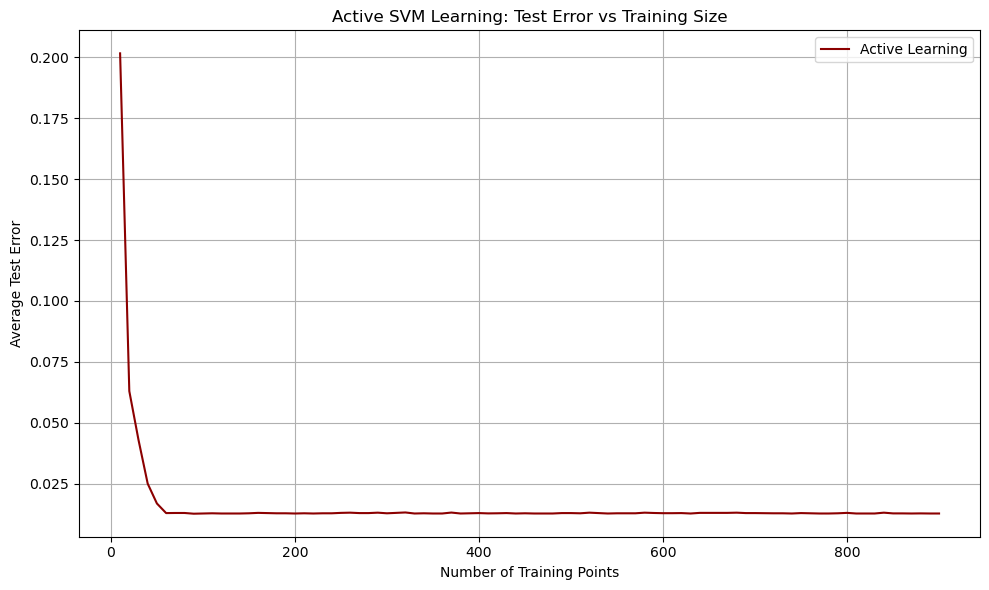

In [36]:
# defining function to implement active learning with linear svm
def activeLearningSvm(inputs_full, targets_full, inputs_eval, targets_eval, trials=50):
    allTrialErrors = []

    # repeating the process for the specified number of trials
    for trial in range(trials):
        trialErrors = []

        # selecting initial pool of 10 random samples
        rng = np.random.default_rng(seed=trial)
        allIndices = np.arange(inputs_full.shape[0])
        initialPick = rng.choice(allIndices, size=10, replace=False)
        remaining = np.setdiff1d(allIndices, initialPick)

        poolInputs = inputs_full[initialPick]
        poolTargets = targets_full[initialPick]

        # iteratively expanding pool until 900 points are used
        while len(poolInputs) <= 900:
            # creating pipeline for normalization and linear svm with l1 penalty
            pipeline = Pipeline([
                ('scale', StandardScaler()),
                ('clf', LinearSVC(penalty='l1', dual=False, max_iter=5000, random_state=trial))
            ])

            # tuning C parameter using stratified 5-fold cross-validation
            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=trial)
            param_grid = {'clf__C': np.logspace(-2, 0, 10)}
            grid = GridSearchCV(pipeline, param_grid, cv=skf, n_jobs=-1)
            grid.fit(poolInputs, poolTargets)

            # evaluating model on test set and recording test error
            test_preds = grid.best_estimator_.predict(inputs_eval)
            error = 1 - accuracy_score(targets_eval, test_preds)
            trialErrors.append(error)

            print(f"[Trial {trial+1}] Pool size: {len(poolInputs)} → Test error: {error:.4f}")

            # breaking the loop when all training points are used
            if len(poolInputs) == 900:
                break

            # selecting 10 most uncertain points (closest to decision boundary)
            scale = grid.best_estimator_.named_steps['scale']
            clf = grid.best_estimator_.named_steps['clf']

            remain_inputs_scaled = scale.transform(inputs_full[remaining])
            decisionVals = np.abs(clf.decision_function(remain_inputs_scaled))
            next_batch = np.argsort(decisionVals)[:10]
            picked = remaining[next_batch]

            # adding selected points to the pool
            poolInputs = np.vstack([poolInputs, inputs_full[picked]])
            poolTargets = np.hstack([poolTargets, targets_full[picked]])

            # removing added points from remaining pool
            remaining = np.setdiff1d(remaining, picked)

        # saving errors for the trial
        allTrialErrors.append(trialErrors)

    # returning test errors for all trials
    return np.array(allTrialErrors)

# running active learning strategy using specified data
errorsActive = activeLearningSvm(
    train_input.to_numpy(),
    train_output.to_numpy(),
    test_input.to_numpy(),
    test_output.to_numpy(),
    trials=50
)

# defining training sizes
x_values = np.arange(10, 901, 10)

# computing mean test error over all trials
avg_errors = np.mean(errorsActive, axis=0)

# plotting learning curve for active learning
plt.figure(figsize=(10, 6))
plt.plot(x_values, avg_errors, color='darkred', label='Active Learning')
plt.xlabel("Number of Training Points")
plt.ylabel("Average Test Error")
plt.title("Active SVM Learning: Test Error vs Training Size")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### (c) Average the 50 test errors

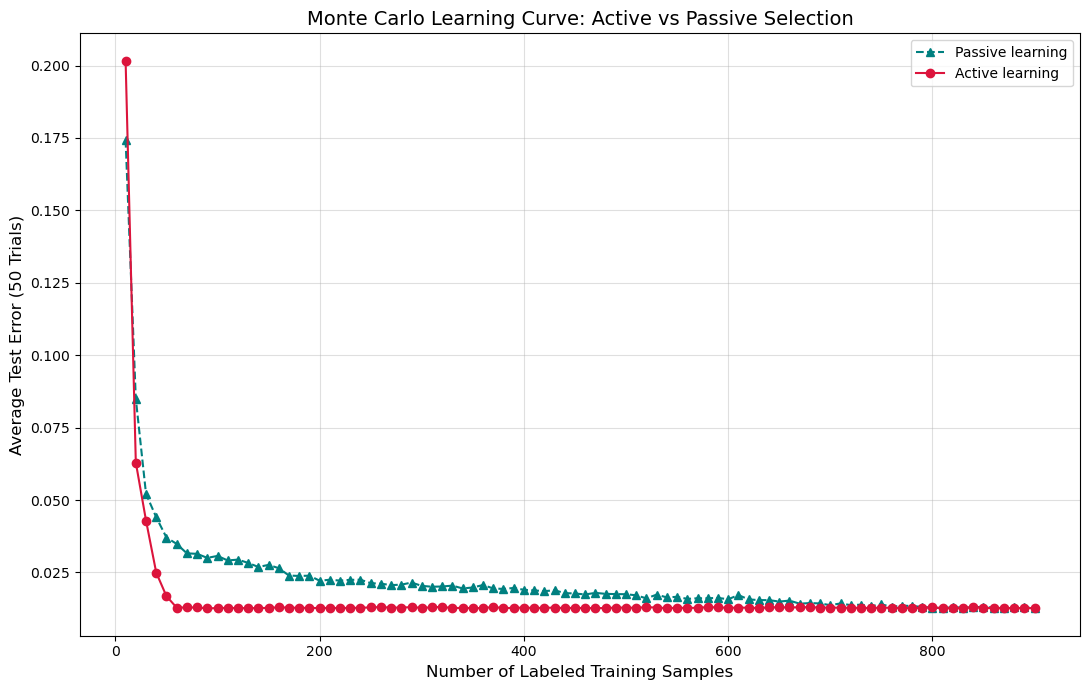

Average Test Error (Active): 0.016
Average Test Error (Passive): 0.0221
Insight: Active learning leads to better generalization, particularly with fewer labeled points.


In [38]:
# averaging errors across 50 trials for both strategies
avgActiveErr = np.mean(errorsActive, axis=0)
avgPassiveErr = np.mean(errorsPassive, axis=0)

# generating training set sizes from 10 to 900
trainingSizes = np.linspace(10, 900, num=90, dtype=int)

# initializing the plot for learning curves
plt.figure(figsize=(11, 7))

# plotting passive learning curve with dashed line and triangle markers
plt.plot(trainingSizes, avgPassiveErr, linestyle='--', marker='^', label="Passive learning", color='teal')

# plotting active learning curve with solid line and circle markers
plt.plot(trainingSizes, avgActiveErr, linestyle='-', marker='o', label="Active learning", color='crimson')

# setting plot title and axis labels
plt.title("Monte Carlo Learning Curve: Active vs Passive Selection", fontsize=14)
plt.xlabel("Number of Labeled Training Samples", fontsize=12)
plt.ylabel("Average Test Error (50 Trials)", fontsize=12)

# displaying legend and grid
plt.legend(loc='upper right')
plt.grid(alpha=0.4)

# adjusting layout for better spacing
plt.tight_layout()
plt.show()

# computing average test errors across all 90 SVMs
overallActive = np.round(np.mean(avgActiveErr), 4)
overallPassive = np.round(np.mean(avgPassiveErr), 4)

# printing average test errors for both strategies
print(f"Average Test Error (Active): {overallActive}")
print(f"Average Test Error (Passive): {overallPassive}")

# comparing strategies and printing conclusion
if overallActive < overallPassive:
    print("Insight: Active learning leads to better generalization, particularly with fewer labeled points.")
else:
    print("Insight: Passive learning performs similarly or better in this scenario, but active learning may still be preferred when labeling cost is high.")


##### Observations:

In active learning, the model picks the data points that are most helpful or uncertain and learns from them first. This smart selection helps the model become more accurate even with fewer labeled examples.

On the other hand, passive learning just uses randomly chosen data without checking if they’re useful. So, it might take more data to reach the same accuracy.

Active learning is more efficient because it chooses the most useful samples. This makes the model learn faster, reduces the risk of overfitting, and handles noisy or irrelevant data better.



### References

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-label
https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://numpy.org/doc/stable/reference/random/generated/numpy.random.default_rng.html
https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html
https://numpy.org/doc/stable/reference/generated/numpy.arange.html
https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
https://numpy.org/doc/stable/reference/generated/numpy.abs.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html
https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.transform
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://numpy.org/doc/stable/user/basics.broadcasting.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering.fit_predict
https://docs.python.org/3/library/stdtypes.html#dict.items
https://docs.python.org/3/library/stdtypes.html#str.capitalize
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html
https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html
https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
https://numpy.org/doc/stable/reference/generated/numpy.hstack.html

